### The object of this project was to implement webscraping, dataframe merging, Machine Learning techniques (Linear Regression, Ridge Regression), show the patterns in the data using Data Visualization libraries (Seaborn, matplotlib), and to generally identify some of the more versatile players in the NBA as it corresponds to multiple variables.

In [1]:
#Here I imported the packages I needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

- The data I collected will be from www.nba.com and www.basketballreference.com for a longitudinal study from the 
2008 - 2009 season to the current 2018 - 2019 season. 

• The salary data I collected comes from www.espn.com and I will be collecting salary data over the span of a decade.
• 2009 - 2010 link: http://www.espn.com/nba/salaries/_/year/2010
• 2010 - 2011 link: http://www.espn.com/nba/salaries/_/year/2011
• 2011 - 2012 link: http://www.espn.com/nba/salaries/_/year/2012
• 2012 - 2013 link: http://www.espn.com/nba/salaries/_/year/2013
• 2013 - 2014 link: http://www.espn.com/nba/salaries/_/year/2014
• 2014 - 2015 link: http://www.espn.com/nba/salaries/_/year/2015
• 2015 - 2016 link: http://www.espn.com/nba/salaries/_/year/2016
• 2016 - 2017 link: http://www.espn.com/nba/salaries/_/year/2017
• 2017 - 2018 link: http://www.espn.com/nba/salaries/_/year/2018
• 2018 - 2019 link: http://www.espn.com/nba/salaries

In [3]:
from IPython.display import Image
from IPython.core.display import HTML

In [4]:
#Maybe put in a picture at the beginning to show versatility? 
Image(url="https://pm1.narvii.com/6516/3a46595380d732cb1224736a92b7a54039777fae_hq.jpg")

In [5]:
import requests 
from lxml import html
import csv

In [6]:
#this is how to access basketballreference website and tap into the data points in question
#I'll have to merge the heights into this at some point soon and get better at webscraping overall
r = requests.get('https://www.basketball-reference.com/leagues/NBA_2014_totals.html')
data = html.fromstring(r.text)

In [7]:
#definitely use some feature engineering

In [8]:
#sal14 = requests.get('http://www.espn.com/nba/salaries/_/year/2014.html')
#data14 = html.fromstring(sal14.text)
url = "http://www.espn.com/nba/salaries/_/year/2014"
html = urlopen(url)

In [9]:
#this allows me to scrape the data from the espn salary web page
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [10]:
title = soup.title
print(title)

<title>NBA Player Salaries - National Basketball Association - ESPN</title>


In [11]:
text = soup.get_text()

In [12]:
soup.find_all('td')
#in this step I scrape table cells which is ID'd by 'td'

[<td width="10%">RK</td>,
 <td width="35%">NAME</td>,
 <td width="35%">TEAM</td>,
 <td style="text-align:right;" width="20%">SALARY</td>,
 <td>1</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/110/kobe-bryant">Kobe Bryant</a>, SF</td>,
 <td><a href="http://www.espn.com/nba/team/_/name/lal/los-angeles-lakers">Los Angeles Lakers</a></td>,
 <td style="text-align:right;">$30,453,805</td>,
 <td>2</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/609/dirk-nowitzki">Dirk Nowitzki</a>, PF</td>,
 <td><a href="http://www.espn.com/nba/team/_/name/dal/dallas-mavericks">Dallas Mavericks</a></td>,
 <td style="text-align:right;">$22,721,381</td>,
 <td>3</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/1727/amar'e-stoudemire">Amar'e Stoudemire</a>, C</td>,
 <td><a href="http://www.espn.com/nba/team/_/name/ny/new-york-knicks">New York Knicks</a></td>,
 <td style="text-align:right;">$21,679,893</td>,
 <td>4</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/1007/joe-johnson">Jo

In [13]:
x = pd.read_html(r.text)

In [14]:
x[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,.660,72,144,216,28,23,26,30,122,171
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,.625,5,10,15,4,4,3,2,8,19
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,.667,67,134,201,24,19,23,28,114,152
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,.581,142,190,332,43,40,57,71,203,265
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,.639,102,204,306,38,24,36,39,108,362
5,3,Jeff Adrien,PF,27,CHA,25,0,256,22,40,...,.520,33,55,88,7,7,15,8,35,57
6,3,Jeff Adrien,PF,27,MIL,28,12,705,121,235,...,.670,69,149,218,31,17,21,31,73,305
7,4,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,...,.815,32,230,262,248,35,3,146,136,1330
8,5,Alexis Ajinca,C,25,NOP,56,30,951,136,249,...,.836,94,183,277,40,23,46,63,187,328
9,6,Cole Aldrich,C,25,NYK,46,2,330,33,61,...,.867,37,92,129,14,8,30,18,40,92


In [15]:
x = x[0]

In [16]:
x = x[x.Rk != "Rk"]

In [17]:
x

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,.660,72,144,216,28,23,26,30,122,171
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,.625,5,10,15,4,4,3,2,8,19
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,.667,67,134,201,24,19,23,28,114,152
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,.581,142,190,332,43,40,57,71,203,265
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,.639,102,204,306,38,24,36,39,108,362
5,3,Jeff Adrien,PF,27,CHA,25,0,256,22,40,...,.520,33,55,88,7,7,15,8,35,57
6,3,Jeff Adrien,PF,27,MIL,28,12,705,121,235,...,.670,69,149,218,31,17,21,31,73,305
7,4,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,...,.815,32,230,262,248,35,3,146,136,1330
8,5,Alexis Ajinca,C,25,NOP,56,30,951,136,249,...,.836,94,183,277,40,23,46,63,187,328
9,6,Cole Aldrich,C,25,NYK,46,2,330,33,61,...,.867,37,92,129,14,8,30,18,40,92


In [18]:
x[x.Tm == "SAC"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,.667,67,134,201,24,19,23,28,114,152
139,102,DeMarcus Cousins,C,23,SAC,71,71,2298,591,1191,...,.726,218,613,831,207,109,91,251,270,1614
150,109,Jared Cunningham,SG,22,SAC,8,0,58,5,19,...,.929,1,4,5,5,3,0,0,13,24
199,140,Reggie Evans,PF,33,SAC,24,14,500,48,91,...,.569,62,123,185,16,24,1,30,65,133
214,153,Jimmer Fredette,SG,24,SAC,41,0,463,94,198,...,.895,7,38,45,61,14,3,44,28,241
226,161,Rudy Gay,SF,27,SAC,55,55,1892,407,844,...,.836,84,220,304,169,67,33,165,124,1107
243,174,Aaron Gray,C,29,SAC,33,6,335,25,58,...,.556,39,64,103,19,10,8,27,57,60
274,197,Chuck Hayes,C,30,SAC,16,1,179,14,32,...,.714,20,27,47,6,11,2,7,18,33
323,239,Orlando Johnson,SG,24,SAC,7,0,50,3,17,...,.500,2,2,4,4,0,1,1,3,9
347,261,Carl Landry,PF,30,SAC,18,1,233,31,60,...,.824,15,42,57,5,3,1,9,34,76


In [19]:
# pairwise comparison where their total games = team number
# speak about tradeoffs 
# add x["Year" ... 2014] you could do loops to get through your years
# add year column for each year, one data frame. so you can get bulls from an entire year so you can plot points from the 
# bulls from end to end and evaluate the curves
# look @ the massive increase or decrease, talk about interesting or not interesting
# look at the fluctuating 3 PT attempts. All the same? Differences? Massive peaks or valleys?
# exploratory data is good --> load into tableau and go nuts
# evaluate dynasties: clustering to identify my outliers? jordan years? larry bird years? 
# best three pointers across the decades? teammates? temporal clustering: how do these look by year, overall? decade, overall?
# increased period of free throw shooting? percentages? hand checking rules? uptick in assists. 
# which role becomes most important? what caused the change in PF affinity?

In [20]:
x[x.Tm == "POR"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10,7,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,...,.822,166,599,765,178,63,68,123,147,1603
47,35,Will Barton,SG,23,POR,41,0,387,65,156,...,.813,16,58,74,33,9,7,18,31,166
50,38,Nicolas Batum,SF,25,POR,82,82,2956,381,819,...,.803,116,495,611,420,75,57,208,156,1070
131,95,Victor Claver,SF,25,POR,21,0,184,17,42,...,.909,9,30,39,12,3,3,11,16,47
141,104,Allen Crabbe,SG,21,POR,15,0,100,12,33,...,.750,1,8,9,6,2,1,3,10,33
216,154,Joel Freeland,C,26,POR,52,0,727,77,162,...,.690,88,120,208,36,10,22,32,95,174
357,269,Meyers Leonard,C,21,POR,40,0,355,41,91,...,.762,26,85,111,18,7,5,15,76,98
361,273,Damian Lillard,PG,23,POR,82,82,2937,553,1304,...,.871,35,253,288,457,64,22,193,197,1695
365,277,Robin Lopez,C,25,POR,82,82,2603,355,644,...,.818,326,374,700,73,25,139,84,196,908
380,289,Wesley Matthews,SG,27,POR,82,82,2780,445,1009,...,.837,51,238,289,197,76,14,110,176,1343


In [21]:
x[x.Tm == "MIA"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14,9,Ray Allen*,SG,38,MIA,73,9,1936,240,543,...,.905,23,182,205,143,54,8,84,115,701
20,13,Chris Andersen,C,35,MIA,72,0,1396,177,275,...,.710,129,250,379,19,32,97,53,162,477
27,19,Joel Anthony,C,31,MIA,12,0,37,2,6,...,1.000,2,5,7,0,0,4,1,4,6
49,37,Shane Battier,SF,35,MIA,73,56,1468,105,275,...,.652,34,104,138,63,50,39,21,124,298
60,43,Michael Beasley,SF,25,MIA,55,2,831,177,355,...,.772,31,141,172,42,23,21,57,93,436
79,60,Chris Bosh,C,29,MIA,79,79,2531,492,953,...,.820,98,424,522,87,80,78,125,192,1281
122,88,Mario Chalmers,PG,27,MIA,73,73,2178,254,560,...,.742,41,173,214,357,119,16,162,210,716
132,96,Norris Cole,PG,25,MIA,82,6,2014,207,500,...,.779,17,143,160,248,77,5,127,156,527
184,127,Toney Douglas,PG,27,MIA,27,17,410,41,104,...,.769,14,47,61,49,13,3,18,47,114
257,183,Justin Hamilton,C,23,MIA,7,0,68,9,20,...,1.000,4,3,7,0,4,0,3,8,26


In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 634
Data columns (total 30 columns):
Rk        611 non-null object
Player    611 non-null object
Pos       611 non-null object
Age       611 non-null object
Tm        611 non-null object
G         611 non-null object
GS        611 non-null object
MP        611 non-null object
FG        611 non-null object
FGA       611 non-null object
FG%       604 non-null object
3P        611 non-null object
3PA       611 non-null object
3P%       515 non-null object
2P        611 non-null object
2PA       611 non-null object
2P%       602 non-null object
eFG%      604 non-null object
FT        611 non-null object
FTA       611 non-null object
FT%       579 non-null object
ORB       611 non-null object
DRB       611 non-null object
TRB       611 non-null object
AST       611 non-null object
STL       611 non-null object
BLK       611 non-null object
TOV       611 non-null object
PF        611 non-null object
PTS       611 non-null ob

In [23]:
x.describe()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,611,611,611,611,611,611,611,611,611,611,...,579,611,611,611,611,611,611,611,611,611
unique,482,481,9,21,31,83,80,523,325,421,...,269,158,290,325,241,120,91,185,215,431
top,314,Darius Morris,SG,23,TOT,82,0,15,0,1,...,1.000,0,0,0,0,0,0,0,0,0
freq,4,4,134,69,63,28,193,5,19,9,...,21,44,17,13,32,47,78,26,17,15


In [24]:
x.mean()

Rk     inf
Age    inf
G      inf
GS     inf
MP     inf
FG     inf
FGA    inf
3P     inf
3PA    inf
2P     inf
2PA    inf
FT     inf
FTA    inf
ORB    inf
DRB    inf
TRB    inf
AST    inf
STL    inf
BLK    inf
TOV    inf
PF     inf
PTS    inf
dtype: float64

In [25]:
x.head()
#just goes off the basis of their last name, accounts for total games, and teams they played per szn

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,.660,72,144,216,28,23,26,30,122,171
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,.625,5,10,15,4,4,3,2,8,19
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,.667,67,134,201,24,19,23,28,114,152
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,.581,142,190,332,43,40,57,71,203,265
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,.639,102,204,306,38,24,36,39,108,362


In [26]:
#this cell helps me remove duplicates so that I can just read the player themself
#documentation: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
#x = x.drop_duplicates(subset=['player'], keep=False)

In [27]:
# Here I'll consider the 2013-2014 salary data since it's the first year I explored:
# http://www.espn.com/nba/salaries/_/year/2014

In [28]:
#pd.read_html('http://www.espn.com/nba/salaries/_/year/2014')
y = requests.get('http://www.espn.com/nba/salaries/_/year/2014.html')
j = pd.read_html(y.text)

In [29]:
#This Cell loops through the 11 pages, and strips the data in my salaries array.
salaries = []
for i in range(1,11):
    y = requests.get('http://www.espn.com/nba/salaries/_/year/2014/page/{}'.format(i))
    j = pd.read_html(y.text)
   # print(x)
    try:
        salaries.append(j[0]) 
    except:
        continue

In [30]:
salaries = pd.concat(salaries)

make both name in salaries and Player to lowercase player
name.str.split()
use this array, -1, this gives me my position
do a join that brings it together

In [31]:
salaries.columns = salaries.iloc[0]

In [32]:
salaries = salaries[salaries.RK != "RK"]

In [33]:
salaries["Pos"] = salaries.NAME.apply(lambda x:x.split()[-1])
#change Name to Player and Position Columns

In [34]:
salaries["Player"] = salaries.NAME.apply(lambda x:" ".join(x.split()[:-1]))

In [35]:
salaries

,RK,NAME,TEAM,SALARY,Pos,Player
1,1,"Kobe Bryant, SF",Los Angeles Lakers,"$30,453,805",SF,"Kobe Bryant,"
2,2,"Dirk Nowitzki, PF",Dallas Mavericks,"$22,721,381",PF,"Dirk Nowitzki,"
3,3,"Amar'e Stoudemire, C",New York Knicks,"$21,679,893",C,"Amar'e Stoudemire,"
4,4,"Joe Johnson, G",Brooklyn Nets,"$21,466,718",G,"Joe Johnson,"
5,5,"Carmelo Anthony, F",New York Knicks,"$21,388,953",F,"Carmelo Anthony,"
6,6,"Dwight Howard, C",Houston Rockets,"$20,513,178",C,"Dwight Howard,"
7,7,"Pau Gasol, C",Los Angeles Lakers,"$19,285,850",C,"Pau Gasol,"
8,8,"Chris Bosh, PF",Miami Heat,"$19,067,500",PF,"Chris Bosh,"
9,9,"LeBron James, SF",Miami Heat,"$19,067,500",SF,"LeBron James,"
10,10,"Dwyane Wade, SG",Miami Heat,"$18,673,000",SG,"Dwyane Wade,"


In [36]:
salaries

,RK,NAME,TEAM,SALARY,Pos,Player
1,1,"Kobe Bryant, SF",Los Angeles Lakers,"$30,453,805",SF,"Kobe Bryant,"
2,2,"Dirk Nowitzki, PF",Dallas Mavericks,"$22,721,381",PF,"Dirk Nowitzki,"
3,3,"Amar'e Stoudemire, C",New York Knicks,"$21,679,893",C,"Amar'e Stoudemire,"
4,4,"Joe Johnson, G",Brooklyn Nets,"$21,466,718",G,"Joe Johnson,"
5,5,"Carmelo Anthony, F",New York Knicks,"$21,388,953",F,"Carmelo Anthony,"
6,6,"Dwight Howard, C",Houston Rockets,"$20,513,178",C,"Dwight Howard,"
7,7,"Pau Gasol, C",Los Angeles Lakers,"$19,285,850",C,"Pau Gasol,"
8,8,"Chris Bosh, PF",Miami Heat,"$19,067,500",PF,"Chris Bosh,"
9,9,"LeBron James, SF",Miami Heat,"$19,067,500",SF,"LeBron James,"
10,10,"Dwyane Wade, SG",Miami Heat,"$18,673,000",SG,"Dwyane Wade,"


In [37]:
x["Player"] = x["Player"].apply(lambda x:x.strip())
salaries["Player"] = salaries["Player"].apply(lambda x:x[:-1].strip())

C:\Users\andre\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
salaries.Player.unique

<bound method Series.unique of 1           Kobe Bryant
2         Dirk Nowitzki
3     Amar'e Stoudemire
4           Joe Johnson
5       Carmelo Anthony
6         Dwight Howard
7             Pau Gasol
8            Chris Bosh
9          LeBron James
10          Dwyane Wade
12           Chris Paul
13       Deron Williams
14        Zach Randolph
15             Rudy Gay
16         Kevin Durant
17         Derrick Rose
18        Blake Griffin
19          Paul Pierce
20        Carlos Boozer
21    LaMarcus Aldridge
23           Marc Gasol
24    Russell Westbrook
25           Kevin Love
26         Emeka Okafor
27          Eric Gordon
28          Roy Hibbert
29            Luol Deng
30       Tyson Chandler
31         Andrew Bogut
32            David Lee
            ...        
40      Leandro Barbosa
41         Luke Babbitt
42        Chris Johnson
43     Shavlik Randolph
1        Dewayne Dedmon
2         Jason Collins
3         Danny Granger
4          Caron Butler
5       Jimmer Fredette
6        

In [39]:
salaries.loc[:, "SALARY"] = salaries["SALARY"].str.replace(",", "")
salaries.loc[:, "SALARY"] = salaries["SALARY"].str.replace("$", "")
salaries["SALARY"] = salaries["SALARY"].astype(int)

In [40]:
x[["Tm"]].drop_duplicates().to_excel("Tm.xlsx")
#do the same with salaries Tm, bring up both spreadsheets, cut and paste and sort them

In [41]:
salaries[["TEAM"]].drop_duplicates().to_excel("TEAM.xlsx")

In [42]:
excel_file = 'TeamsUpdtd.xlsx'

In [43]:
teamsupd = pd.read_excel(excel_file)

In [44]:
teamsupd

,Tm,TEAM
0,ATL,Atlanta Hawks
1,BOS,Boston Celtics
2,BRK,Brooklyn Nets
3,CHA,Charlotte Bobcats
4,CHI,Chicago Bulls
5,CLE,Cleveland Cavaliers
6,DAL,Dallas Mavericks
7,DEN,Denver Nuggets
8,DET,Detroit Pistons
9,GSW,Golden State Warriors


In [45]:
salaries=salaries.merge(teamsupd,how="left",on="TEAM")

In [46]:
#x[["Tm"]].drop_duplicates().to_excel("Tm.xlsx")
#do the same with salaries Tm, bring up both spreadsheets, cut and paste and sort them
#salaries[["TEAM"]].drop_duplicates().to_excel("TEAM.xlsx")

In [47]:
#attempting to put salary and player data together
#the merge dataframe
mrgdf = x.merge(salaries, how = 'inner', left_on='Player', right_on='Player')

In [48]:
#x.merge(salaries, , on=['Player', 'TEAM'])

#x["Tm"] = x.NAME.apply(lambda x:x.split()[-1])
#change Name to Player and Position Columns


#merge the x dataframe with the team expansion
#x TM needs to be merged with x TEAM so that they call the same team when you are toying with the data

mrgdf

,Rk,Player,Pos_x,Age,Tm_x,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Pos_y,Tm_y
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,26,30,122,171,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,3,2,8,19,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,23,28,114,152,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,57,71,203,265,225,"Steven Adams, C",Oklahoma City Thunder,2090880,C,OKC
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,36,39,108,362,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
5,3,Jeff Adrien,PF,27,CHA,25,0,256,22,40,...,15,8,35,57,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
6,3,Jeff Adrien,PF,27,MIL,28,12,705,121,235,...,21,31,73,305,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
7,5,Alexis Ajinca,C,25,NOP,56,30,951,136,249,...,46,63,187,328,336,"Alexis Ajinca, C",New Orleans Pelicans,635880,C,NOP
8,6,Cole Aldrich,C,25,NYK,46,2,330,33,61,...,30,18,40,92,317,"Cole Aldrich, C",New York Knicks,884293,C,NYK
9,7,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,...,68,123,147,1603,20,"LaMarcus Aldridge, C",Portland Trail Blazers,14878000,C,POR


In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 634
Data columns (total 30 columns):
Rk        611 non-null object
Player    611 non-null object
Pos       611 non-null object
Age       611 non-null object
Tm        611 non-null object
G         611 non-null object
GS        611 non-null object
MP        611 non-null object
FG        611 non-null object
FGA       611 non-null object
FG%       604 non-null object
3P        611 non-null object
3PA       611 non-null object
3P%       515 non-null object
2P        611 non-null object
2PA       611 non-null object
2P%       602 non-null object
eFG%      604 non-null object
FT        611 non-null object
FTA       611 non-null object
FT%       579 non-null object
ORB       611 non-null object
DRB       611 non-null object
TRB       611 non-null object
AST       611 non-null object
STL       611 non-null object
BLK       611 non-null object
TOV       611 non-null object
PF        611 non-null object
PTS       611 non-null ob

In [50]:
xx2=x.copy()
for c in xx2.columns:
    xx2[c]=pd.to_numeric(xx2[c],errors="ignore")

In [51]:
xx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 634
Data columns (total 30 columns):
Rk        611 non-null int64
Player    611 non-null object
Pos       611 non-null object
Age       611 non-null int64
Tm        611 non-null object
G         611 non-null int64
GS        611 non-null int64
MP        611 non-null int64
FG        611 non-null int64
FGA       611 non-null int64
FG%       604 non-null float64
3P        611 non-null int64
3PA       611 non-null int64
3P%       515 non-null float64
2P        611 non-null int64
2PA       611 non-null int64
2P%       602 non-null float64
eFG%      604 non-null float64
FT        611 non-null int64
FTA       611 non-null int64
FT%       579 non-null float64
ORB       611 non-null int64
DRB       611 non-null int64
TRB       611 non-null int64
AST       611 non-null int64
STL       611 non-null int64
BLK       611 non-null int64
TOV       611 non-null int64
PF        611 non-null int64
PTS       611 non-null int64
dtypes: floa

In [52]:
mrgdf

,Rk,Player,Pos_x,Age,Tm_x,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Pos_y,Tm_y
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,26,30,122,171,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,3,2,8,19,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,23,28,114,152,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,57,71,203,265,225,"Steven Adams, C",Oklahoma City Thunder,2090880,C,OKC
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,36,39,108,362,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
5,3,Jeff Adrien,PF,27,CHA,25,0,256,22,40,...,15,8,35,57,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
6,3,Jeff Adrien,PF,27,MIL,28,12,705,121,235,...,21,31,73,305,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
7,5,Alexis Ajinca,C,25,NOP,56,30,951,136,249,...,46,63,187,328,336,"Alexis Ajinca, C",New Orleans Pelicans,635880,C,NOP
8,6,Cole Aldrich,C,25,NYK,46,2,330,33,61,...,30,18,40,92,317,"Cole Aldrich, C",New York Knicks,884293,C,NYK
9,7,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,...,68,123,147,1603,20,"LaMarcus Aldridge, C",Portland Trail Blazers,14878000,C,POR


# Data Analysis 

In [53]:
#all this literally comes after data cleaning
#make sure I import my libraries and to have quality visuals
mrgdf.describe()

,SALARY
count,4.730000e+02
mean,4.213025e+06
std,4.816370e+06
min,9.281000e+03
25%,9.479070e+05
50%,2.511432e+06
75%,5.324280e+06
max,3.045380e+07


In [54]:
mrgdf['Tm_x'].describe()

count     473
unique     31
top       TOT
freq       51
Name: Tm_x, dtype: object

In [55]:
mrgdf.groupby('Tm_x').size()

Tm_x
ATL    15
BOS    17
BRK    15
CHA    16
CHI    18
CLE    15
DAL    11
DEN    12
DET    13
GSW    17
HOU    15
IND    13
LAC    12
LAL    10
MEM    14
MIA    13
MIL    18
MIN    14
NOP    15
NYK    11
OKC    13
ORL     6
PHI    13
PHO    13
POR    13
SAC    19
SAS    17
TOR    19
TOT    51
UTA    13
WAS    12
dtype: int64

In [56]:
mrgdf.groupby('Pos_x').size()
#good, accounts for swingmen, cornermen, combos!
#this identifies hybrid NBA players which are SUPER valuable in today's game.

Pos_x
C         94
PF        93
PF-SF      1
PG        80
SF       102
SF-PF      1
SG        99
SG-PG      2
SG-SF      1
dtype: int64

In [57]:
rosters = mrgdf
teams = mrgdf.groupby('Tm_x').mean().sort_values(by=['SALARY'])
teams
#evaluates salary per team

,SALARY
Tm_x,
ORL,1.949160e+06
PHO,2.457145e+06
PHI,2.539976e+06
TOT,2.837089e+06
MIL,2.902419e+06
CHA,3.149830e+06
UTA,3.338704e+06
ATL,3.339141e+06
SAS,3.710980e+06


# Data Visualizations

### As discussed, there are a number of things that can have implications on any given basketball player's peformance.
### Among these, we consider whether or not a player is in a contract year, injury history, age, and other factors.

In [58]:
mrgdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 472
Data columns (total 36 columns):
Rk        473 non-null object
Player    473 non-null object
Pos_x     473 non-null object
Age       473 non-null object
Tm_x      473 non-null object
G         473 non-null object
GS        473 non-null object
MP        473 non-null object
FG        473 non-null object
FGA       473 non-null object
FG%       469 non-null object
3P        473 non-null object
3PA       473 non-null object
3P%       403 non-null object
2P        473 non-null object
2PA       473 non-null object
2P%       467 non-null object
eFG%      469 non-null object
FT        473 non-null object
FTA       473 non-null object
FT%       461 non-null object
ORB       473 non-null object
DRB       473 non-null object
TRB       473 non-null object
AST       473 non-null object
STL       473 non-null object
BLK       473 non-null object
TOV       473 non-null object
PF        473 non-null object
PTS       473 non-null ob

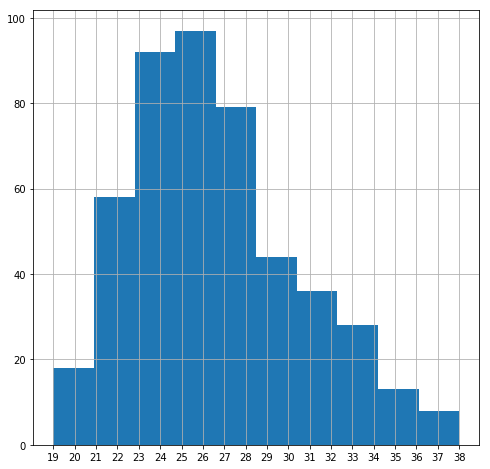

In [59]:
mrgdf['Age'].hist(figsize=(8,8))
#histogram is fitting bc frequency of score occurrences in a 
#continuous data set that has been divided into classes, called bins
#This plot tells me that the age of the NBA players follows a trend similar to a normal curve
#outliers are on either extreme, oldest player(s) is/are 38 years old
#youngest players in 19 years old

In [60]:
mrgdf["Age"]=mrgdf["Age"].astype(int)
mrgdf["G"]=mrgdf["G"].astype(int)

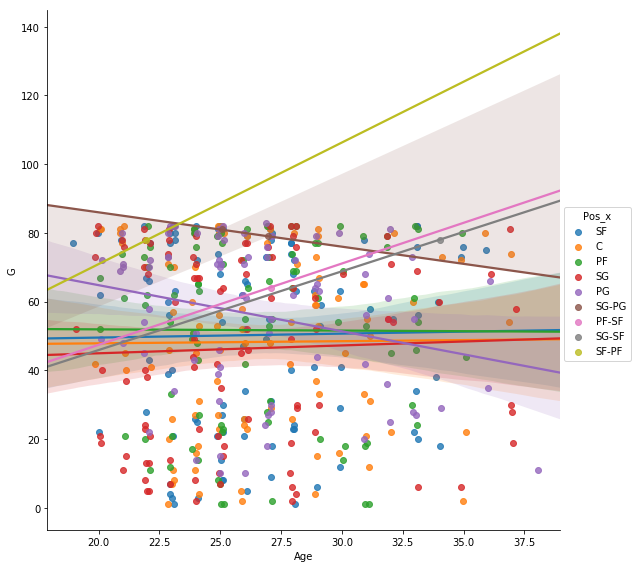

In [61]:
sns.lmplot("Age", "G", mrgdf, hue="Pos_x", x_jitter=.15, size=8)
#This chart was pretty challenging to make sense of so I split it into each position.

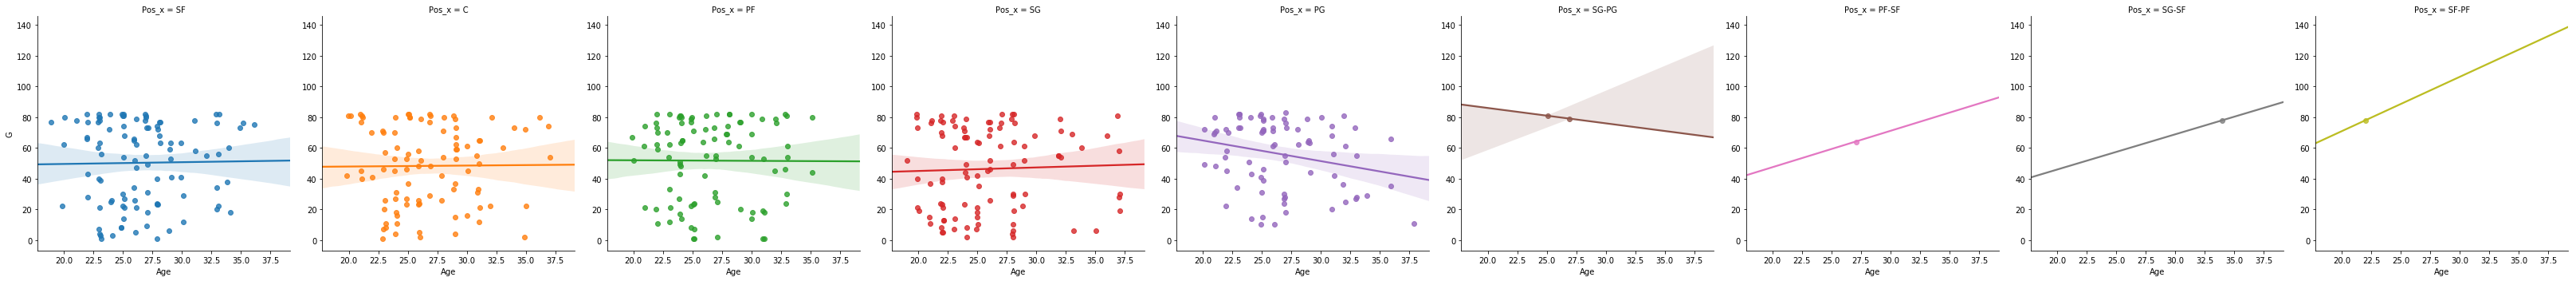

In [62]:
sns.lmplot("Age", "G", mrgdf, col="Pos_x", hue="Pos_x", x_jitter=.15, size=5)
#compares Age and Games played
#none of the individual positions gave particularly strong correlation coefficients
#the hybrid positions showed stronger relationships between age and games played
#Point guards play less as they get older, this makes sense! PG is the easiest position to replace!
#As positions change, PGs also are the most 'talent dense' position.

## While it may be easy to believe age and salary have an inverse relationship, this isn't necessarily true. Some players entire their primes and earn increased salaries until their age and injury history catch up with the way they are compensated through salary.

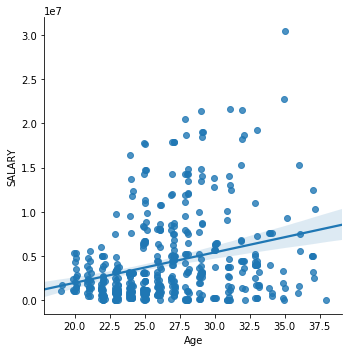

In [63]:
sns.lmplot("Age", "SALARY", mrgdf, x_jitter =.15)
#I would have thought this would have been sharper in terms of my correlation coefficient
#In theory this would resemble a bell curve

In [64]:
mrgdf

,Rk,Player,Pos_x,Age,Tm_x,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Pos_y,Tm_y
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,26,30,122,171,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,3,2,8,19,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,23,28,114,152,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,57,71,203,265,225,"Steven Adams, C",Oklahoma City Thunder,2090880,C,OKC
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,36,39,108,362,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
5,3,Jeff Adrien,PF,27,CHA,25,0,256,22,40,...,15,8,35,57,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
6,3,Jeff Adrien,PF,27,MIL,28,12,705,121,235,...,21,31,73,305,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
7,5,Alexis Ajinca,C,25,NOP,56,30,951,136,249,...,46,63,187,328,336,"Alexis Ajinca, C",New Orleans Pelicans,635880,C,NOP
8,6,Cole Aldrich,C,25,NYK,46,2,330,33,61,...,30,18,40,92,317,"Cole Aldrich, C",New York Knicks,884293,C,NYK
9,7,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,...,68,123,147,1603,20,"LaMarcus Aldridge, C",Portland Trail Blazers,14878000,C,POR


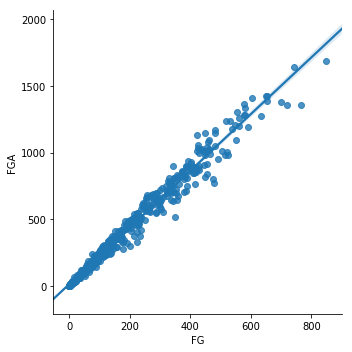

In [65]:
mrgdf["FG"]=mrgdf["FG"].astype(int)
mrgdf["FGA"]=mrgdf["FGA"].astype(int)
sns.lmplot("FG", "FGA", mrgdf, x_jitter=.2)
#sns.lmplot("fg_per_g", "fga_per_g", df, x_jitter=.30)
#the more you shoot, the more shots you make, makes sense, extremely high correlation

### Also have to account for the qualities in a player that deflate their overall value/effectiveness. Consider things like ejections, technical fouls, flagrant fouls, personal fouls, turnovers, etc. Dataset only considers personal fouls and turnovers so those will be my main parameters

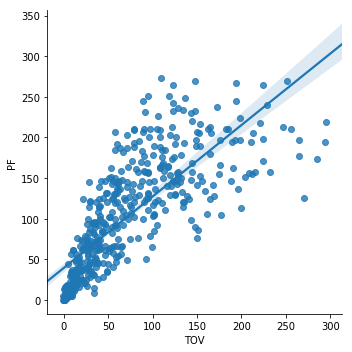

In [66]:
#Here I change the type of the objects to numerical values so that I can run data analysis on them.
mrgdf["TOV"]=mrgdf["TOV"].astype(int)
mrgdf["PF"]=mrgdf["PF"].astype(int)
sns.lmplot("TOV", "PF", mrgdf, x_jitter=.30)
#more turnovers correlate to more personal fouls
#attitude? Frustration fouls? Technical fouls? 

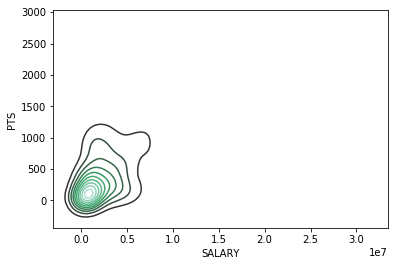

In [67]:
#Implementing Kernel Density Plots to represent relationship between
#Salary and Points scored by players
sns.kdeplot(mrgdf.SALARY, mrgdf.PTS)

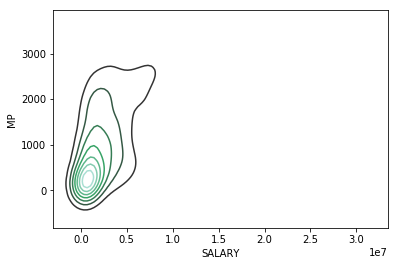

In [68]:
sns.kdeplot(mrgdf.SALARY, mrgdf.MP)

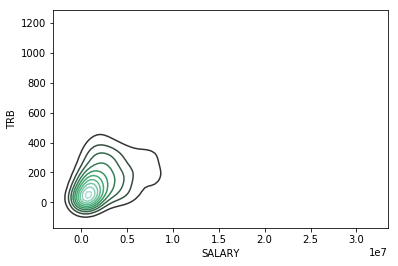

In [69]:
sns.kdeplot(mrgdf.SALARY, mrgdf.TRB)

In [70]:
mrgdf

,Rk,Player,Pos_x,Age,Tm_x,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Pos_y,Tm_y
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,26,30,122,171,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,3,2,8,19,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,23,28,114,152,325,"Quincy Acy, F",Toronto Raptors,788872,F,TOR
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,57,71,203,265,225,"Steven Adams, C",Oklahoma City Thunder,2090880,C,OKC
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,36,39,108,362,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
5,3,Jeff Adrien,PF,27,CHA,25,0,256,22,40,...,15,8,35,57,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
6,3,Jeff Adrien,PF,27,MIL,28,12,705,121,235,...,21,31,73,305,309,"Jeff Adrien, SF",Charlotte Bobcats,916099,SF,CHA
7,5,Alexis Ajinca,C,25,NOP,56,30,951,136,249,...,46,63,187,328,336,"Alexis Ajinca, C",New Orleans Pelicans,635880,C,NOP
8,6,Cole Aldrich,C,25,NYK,46,2,330,33,61,...,30,18,40,92,317,"Cole Aldrich, C",New York Knicks,884293,C,NYK
9,7,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,...,68,123,147,1603,20,"LaMarcus Aldridge, C",Portland Trail Blazers,14878000,C,POR


### This wouldn't be a true project without some kind of regression, am I right?
### Regression!

In [71]:
#regression packages that are necessary
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from bokeh.models import Jitter

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

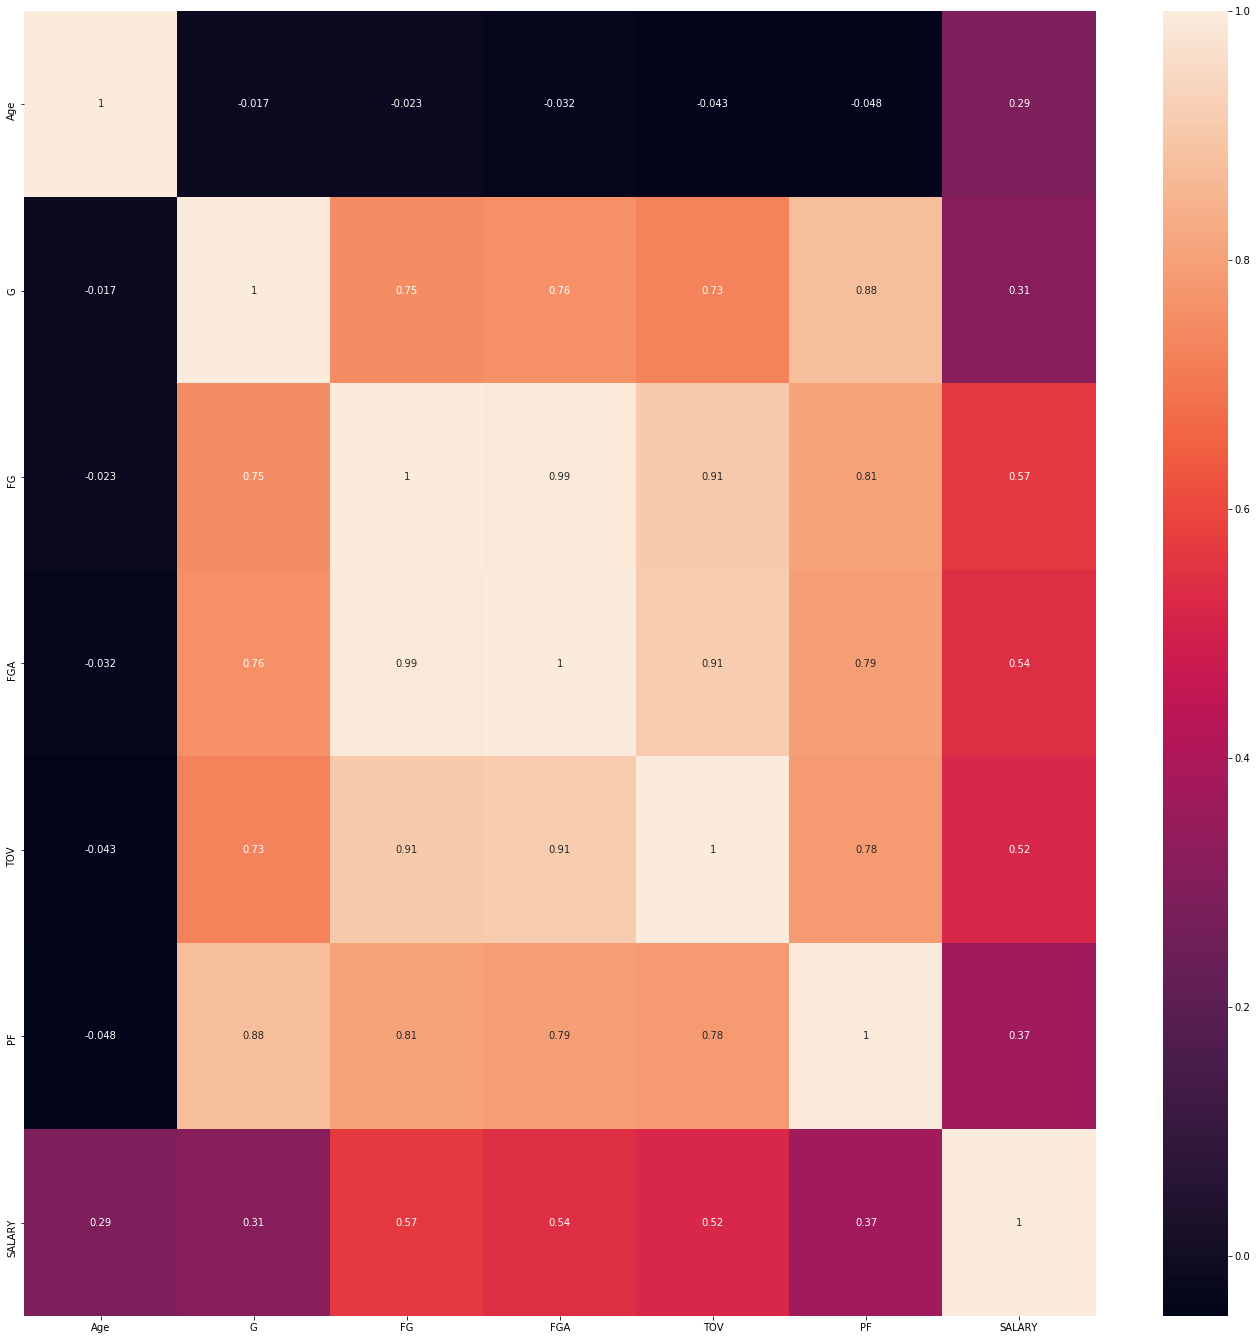

In [72]:
plt.figure(figsize=(24,24))

#plt.colorbar()
sns.heatmap(mrgdf.corr(), annot=True)
#heatmap colors the correlation between variables pretty well
#closer the score is to 1, the stronger it will be

In [73]:
# Run a Ridge Regression for the data
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [74]:
from datacleaner import autoclean
#read about this, does some more cleaning
#plugs in numerical variables for the categorical variables
#gives a number to the varying positions
#why is this important? It helps identify hybrid players --> versatile players
clean_data = autoclean(mrgdf, drop_nans=True)
clean_data = autoclean(mrgdf)

clean_data.head()

,Rk,Player,Pos_x,Age,Tm_x,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,RK,NAME,TEAM,SALARY,Pos_y,Tm_y
0,0,245,4,23,28,63,0,349,66,141,...,30,30,122,90,208,245,27,788872,1,27
1,0,245,4,23,27,7,0,311,6,14,...,34,2,8,104,208,245,27,788872,1,27
2,0,245,4,23,25,56,0,338,60,127,...,28,28,114,78,208,245,27,788872,1,27
7,278,7,0,25,18,56,23,363,136,249,...,52,63,187,160,219,7,18,635880,0,18
9,293,182,1,28,24,69,59,207,652,1423,...,68,123,147,85,93,182,24,14878000,0,24


In [75]:
mrgdf = clean_data.drop('Player', axis = 1)

In [76]:
mrgdf = mrgdf.drop("Pos_x", axis = 1)
mrgdf = mrgdf.drop("Tm_x", axis = 1)

In [77]:
#label columns to X and Y variables
#here I build the model
#Why Lasso? 
#Ridge and lasso regression allow you to regularize ("shrink") coefficients. 
#This means that the estimated coefficients are pushed towards 0, 
#to make them work better on new data-sets ("optimized for prediction"). 
#This allows you to use complex models and avoid over-fitting at the same time.
y = mrgdf['SALARY'] 
X = mrgdf.drop(['SALARY'], axis =1)
reg = linear_model.Ridge (alpha = .1)
reg.fit(X,y) 
reg_y = reg.predict(X)
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
print(reg.coef_)

print(reg.intercept_) 
#print_sep()
print("mean square error: ", mean_squared_error(y, reg_y))
#print_sep()
print("variance or r-squared: ", explained_variance_score(y, reg_y))
#prints out the coefficients for all the x-values
#variance or r-squared the closer to one, the better the model predicts
#this accuracy left a lot to be desired...

[ -1.02435403e+03   4.08648580e+05  -5.56723384e+04   1.84958477e+04
  -1.44560186e+03   4.35724039e+04  -1.22620742e+04   2.29911412e+04
   7.91578966e+03   1.05059984e+03   6.52210294e+03   7.76370170e+02
   4.11190820e+02   6.41842827e+03  -4.40960005e+04   1.69554890e+03
   5.15915976e+02  -3.78593897e+02   8.29768109e+03  -4.27041945e+03
   3.68629832e+03   2.45883506e+03   1.27993788e+04   2.70167908e+03
   1.23854707e+04  -1.14556570e+04  -2.77581570e+02  -4.82436897e+02
   2.31185903e+03  -4.39955474e+03  -1.27779530e+05  -4.39955474e+03]
-8096128.97028
mean square error:  1.14019808957e+13
variance or r-squared:  0.533631417961


In [78]:
#same approach, not much changed
y = mrgdf['SALARY'] 
X = mrgdf.drop(['SALARY'], axis =1)
reg = linear_model.Lasso(alpha = 0.1)        #higher alpha (penality parameter), fewer predictors
reg.fit(X, y)
reg_y = reg.predict(X)
print('Coefficients: ', reg.coef_)
print("y-intercept ", reg.intercept_)
print("mean square error: ", mean_squared_error(y, reg_y))
print("variance or r-squared: ", explained_variance_score(y, reg_y))

Coefficients:  [ -1.02440561e+03   4.08655346e+05  -5.56727790e+04   1.84957399e+04
  -1.44563060e+03   4.35709081e+04  -1.22613708e+04   2.29912627e+04
   7.91579659e+03   1.05062011e+03   6.52204492e+03   7.76388405e+02
   4.11196654e+02   6.41863603e+03  -4.40958562e+04   1.69549366e+03
   5.15988681e+02  -3.78667157e+02   8.29766323e+03  -4.27043103e+03
   3.68635471e+03   2.45883677e+03   1.27994037e+04   2.70154367e+03
   1.23855132e+04  -1.14556831e+04  -2.77567865e+02  -4.82435929e+02
   2.31183093e+03  -8.67198872e+03  -1.27792267e+05  -1.26903450e+02]
y-intercept  -8096275.18132
mean square error:  1.14019808953e+13
variance or r-squared:  0.533631417981


C:\Users\andre\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [79]:
# The rank of features to indicate which actually provides more salary
# all this code does is show top/most valuable variables
y = mrgdf['SALARY'] 
X = mrgdf.drop(['SALARY'], axis =1)
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: x, rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'Age'), (1, 'Pos_y'), (2, 'G'), (3, 'FG%'), (4, 'eFG%'), (5, 'FG'), (6, 'STL'), (7, 'GS'), (8, 'TOV'), (9, 'PF'), (10, 'FGA'), (11, '3P'), (12, 'ORB'), (13, 'Tm_y'), (14, '2P%'), (15, '3P%'), (16, 'DRB'), (17, 'TRB'), (18, 'TEAM'), (19, 'BLK'), (20, 'AST'), (21, 'NAME'), (22, 'FT'), (23, 'MP'), (24, '3PA'), (25, 'Rk'), (26, '2P'), (27, 'FTA'), (28, 'RK'), (29, 'FT%'), (30, '2PA'), (31, 'PTS')]


In [80]:
x = mrgdf[['FG','FGA','TRB', 'AST','FT','FTA', 'Age', 'G', 'GS']]
Y = mrgdf['SALARY'] 
model1 = lm.LinearRegression()
model1.fit(x, Y)   
model1_y = model1.predict(x)
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in x.columns ]
zip(xcolumns, coef)
print("mean square error: ", mean_squared_error(y, model1_y))
#print_sep()
print("variance or r-squared: ", explained_variance_score(y, model1_y))
#print_sep()
print('Coefficients: ', model1.coef_)
#print_sep()
print("y-intercept ", model1.intercept_)

#clearly the r-squared values aren't justifying my efforts

mean square error:  1.29887843627e+13
variance or r-squared:  0.468727320187
Coefficients:  [  3.58936547e+04  -6.92535378e+03   3.18610194e+02   2.72949828e+03
   1.08258742e+03   5.98253103e+02   3.83316085e+05  -6.71987116e+04
   1.26223764e+04]
y-intercept  -7150119.65656


In [81]:
#percentages are good predictors 
#but it keeps decreasing the r-squared values
x = mrgdf[['FG%', 'FT%', '3P%','2P%','eFG%', 'AST','TOV','Age','G']]
Y = mrgdf['SALARY'] 
model1 = lm.LinearRegression()
model1.fit(x, Y)   
model1_y = model1.predict(x)
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in x.columns ]
zip(xcolumns, coef)
print("mean square error: ", mean_squared_error(y, model1_y))
#print_sep()
print("variance or r-squared: ", explained_variance_score(y, model1_y))
#print_sep()
print('Coefficients: ', model1.coef_)
#print_sep()
print("y-intercept ", model1.intercept_)
#MSE takes the residuals, squares them, lower the MSE, the more accurate the model
#Perform a scatterplot matrix, plots each pair of variables
#Creates a heatmap plot with correlations coefficients through a dot plot to show why it's happening
#Maybe you should consider the fact that there could be quadratic and cubic functions
#Jamal Crawford, goes to many teams, express this through a network graph?

mean square error:  1.39929221004e+13
variance or r-squared:  0.427655659293
Coefficients:  [  33759.93886786    3853.11850584    5723.61014202   11557.36646141
  -37093.26322248    1738.48097496   46258.4219124   430688.27278467
  -43005.33955592]
y-intercept  -10148640.9633


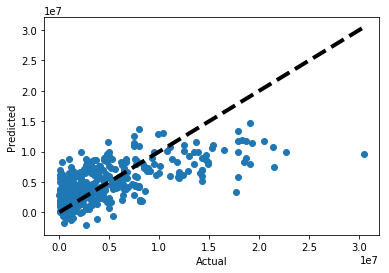

In [82]:
#visualize actural vs. predictive using scatter plot
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [83]:
#runs_reg_model1 = sm.ols("SALARY + 2PA + TRB + AST + FT + Age + G", mrgdf) 
#runs_reg = runs_reg_model1.fit()
#print(runs_reg.summary())
runs_reg_model1 = sm.ols("SALARY~FG+FGA+PTS+TRB+AST+TOV+Age+G",mrgdf)
runs_reg = runs_reg_model1.fit()
print(runs_reg.summary())
#running different models to predict different MSE and R-squared values
#Perhaps the data wasn't expansive enough to predict salary?

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     43.69
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           1.13e-49
Time:                        16:58:25   Log-Likelihood:                -6538.3
No. Observations:                 396   AIC:                         1.309e+04
Df Residuals:                     387   BIC:                         1.313e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.204e+06   1.42e+06     -5.071      0.0

### As seen by the variance/r-squared value, and how it continues to decrease, my model was not particularly strong. This begs the question, what could have been done to improve the project overall? Perhaps it points to the fact that my dataset didn't have enough features to predict salary. In the future, I would be sure to find datasets with more variables to have a more precise prediction and higher variance score.

In [86]:
jupyter nbconvert --execute --to html notebook.ipynb

SyntaxError: invalid syntax (<ipython-input-86-2304852a111c>, line 1)